In [1]:
import codecs
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from nltk.tokenize import TreebankWordTokenizer
import emoji
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer


In [130]:
def load_data(filename):
    data = list(codecs.open(filename, 'r', 'utf-8').readlines())
    x, y = zip(*[d.strip().split('\t') for d in data])
    # Reducing any char-acter sequence of more than 3 consecutive repetitions to a respective 3-character sequence 
    # (e.g. “!!!!!!!!”turns to “!!!”)
    # x = [re.sub(r'((.)\2{3,})', r'\2\2\2', i) for i in x]
    x = np.asarray(list(x))
    y = np.array(y).astype(np.int)
    #y = to_categorical(y, 3)
    
    
    return x, y

In [3]:
def extract_emojis(text):
  return ''.join(c for c in text if c in emoji.UNICODE_EMOJI['en'])

def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [4]:
def tfidf(data, ngrams=(1, 1)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

In [131]:
x_token_train, y_token_train = load_data('Neural-Sentiment-Analyzer-for-Modern-Hebrew/data/token_train.tsv')
x_token_test, y_token_test = load_data('Neural-Sentiment-Analyzer-for-Modern-Hebrew/data/token_test.tsv')
x_morph_train, y_morph_train = load_data('Neural-Sentiment-Analyzer-for-Modern-Hebrew/data/morph_train.tsv')
x_morph_test, y_morph_test = load_data('Neural-Sentiment-Analyzer-for-Modern-Hebrew/data/morph_test.tsv')


In [132]:
y_token_test

array([0, 0, 0, ..., 1, 0, 0])

In [12]:
hebrew_stop_words = ['אני',
'את',
'אתה',
'אנחנו',
'אתן',
'אתם',
'הם',
'הן',
'היא',
'הוא',
'שלי',
'שלו',
'שלך',
'שלה',
'שלנו',
'שלכם',
'שלכן',
'שלהם',
'שלהן',
'לי',
'לו',
'לה',
'לנו',
'לכם',
'לכן',
'להם',
'להן',
'אותה',
'אותו',
'זה',
'זאת',
'אלה',
'אלו',
'תחת',
'מתחת',
'מעל',
'בין',
'עם',
'עד',
'נגר',
'על',
'אל',
'מול',
'של',
'אצל',
'כמו',
'אחר',
'אותו',
'בלי',
'לפני',
'אחרי',
'מאחורי',
'עלי',
'עליו',
'עליה',
'עליך',
'עלינו',
'עליכם',
'לעיכן',
'עליהם',
'עליהן',
'כל',
'כולם',
'כולן',
'כך',
'ככה',
'כזה',
'זה',
'זות',
'אותי',
'אותה',
'אותם',
'אותך',
'אותו',
'אותן',
'אותנו',
'ואת',
'את',
'אתכם',
'אתכן',
'איתי',
'איתו',
'איתך',
'איתה',
'איתם',
'איתן',
'איתנו',
'איתכם',
'איתכן',
'יהיה',
'תהיה',
'היתי',
'היתה',
'היה',
'להיות',
'עצמי',
'עצמו',
'עצמה',
'עצמם',
'עצמן',
'עצמנו',
'עצמהם',
'עצמהן',
'מי',
'מה',
'איפה',
'היכן',
'במקום שבו',
'אם',
'לאן',
'למקום שבו',
'מקום בו',
'איזה',
'מהיכן',
'איך',
'כיצד',
'באיזו מידה',
'מתי',
'בשעה ש',
'כאשר',
'כש',
'למרות',
'לפני',
'אחרי',
'מאיזו סיבה',
'הסיבה שבגללה',
'למה',
'מדוע',
'לאיזו תכלית',
'כי',
'יש',
'אין',
'אך',
'מנין',
'מאין',
'מאיפה',
'יכל',
'יכלה',
'יכלו',
'יכול',
'יכולה',
'יכולים',
'יכולות',
'יוכלו',
'יוכל',
'מסוגל',
'לא',
'רק',
'אולי',
'אין',
'לאו',
'אי',
'כלל',
'נגד',
'אם',
'עם',
'אל',
'אלה',
'אלו',
'אף',
'על',
'מעל',
'מתחת',
'מצד',
'בשביל',
'לבין',
'באמצע',
'בתוך',
'דרך',
'מבעד',
'באמצעות',
'למעלה',
'למטה',
'מחוץ',
'מן',
'לעבר',
'מכאן',
'כאן',
'הנה',
'הרי',
'פה',
'שם',
'אך',
'ברם',
'שוב',
'אבל',
'מבלי',
'בלי',
'מלבד',
'רק',
'בגלל',
'מכיוון',
'עד',
'אשר',
'ואילו',
'למרות',
'אס',
'כמו',
'כפי',
'אז',
'אחרי',
'כן',
'לכן',
'לפיכך',
'מאד',
'עז',
'מעט',
'מעטים',
'במידה',
'שוב',
'יותר',
'מדי',
'גם',
'כן',
'נו',
'אחר',
'אחרת',
'אחרים',
'אחרות',
'אשר',
'או'];

In [13]:
import json
with open('hebrewStopWords.json', 'w') as f:
    json.dump(hebrew_stop_words, f)

In [14]:
stop_words =[]
with open('hebrewStopWords.json', 'r') as f:
    stop_words = json.load(f)

In [133]:
# prepare the courpus

tokenizer = TreebankWordTokenizer()

train_df = pd.DataFrame()
train_df["text"] = x_token_train;

train_df["emoji"] = train_df.text.map(lambda x: set(extract_emojis(x)))

train_df["clean_text"] = train_df.text.map(lambda x: remove_URL(x))
train_df["clean_text"] = train_df.text.map(lambda x: remove_html(x))
train_df["clean_text"] = train_df.text.map(lambda x: remove_emoji(x))
train_df["clean_text"] = train_df.text.map(lambda x: remove_punct(x))

train_df["clean_tokens"] = train_df.clean_text.map(tokenizer.tokenize)

train_df["target"] = y_token_train


In [134]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          10244 non-null  object
 1   emoji         10244 non-null  object
 2   clean_text    10244 non-null  object
 3   clean_tokens  10244 non-null  object
 4   target        10244 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 360.3+ KB


In [17]:
from wordcloud import WordCloud

In [18]:
bd_hsw = get_display(" ".join(stop_words)).split(" ")

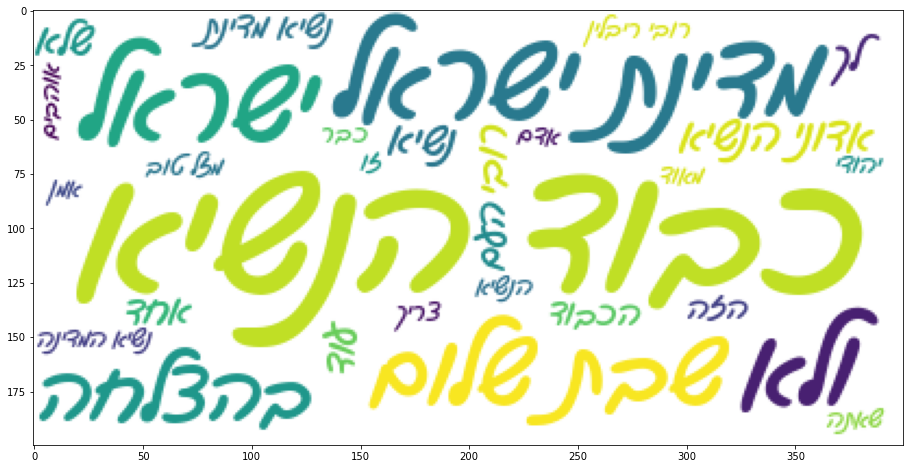

In [19]:


all_words_wc = WordCloud(
    font_path='Fonts/GveretLevinAlefAlefAlef-Regular.ttf',
    background_color="white",
    stopwords=bd_hsw,
    max_words=30,
    max_font_size=80).generate(get_display(all_clean_words))

plt.figure(figsize=(16, 8))
plt.imshow(all_words_wc, )

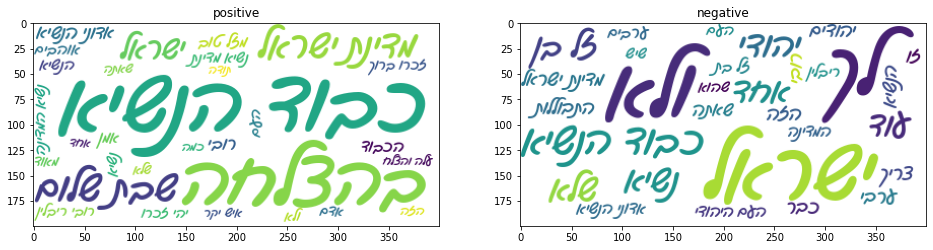

In [349]:
# Divide the corpus to negative and positive

positive_df = train_df[train_df["target"] == 0]
negative_df = train_df[train_df["target"] == 1]

all_positive_wc = WordCloud(
    font_path='Fonts/GveretLevinAlefAlefAlef-Regular.ttf',
    background_color="white",
    stopwords=bd_hsw,
    max_words=30,
    max_font_size=80).generate(get_display(" ".join(positive_df.clean_text)))

all_negative_wc = WordCloud(
    font_path='Fonts/GveretLevinAlefAlefAlef-Regular.ttf',
    background_color="white",
    stopwords=bd_hsw,
    max_words=30,
    max_font_size=80).generate(get_display(" ".join(negative_df.clean_text)))

plt.figure(1, figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("positive")
plt.imshow(all_positive_wc)

plt.subplot(1, 2, 2)
plt.title("negative")
plt.imshow(all_negative_wc)


In [ ]:
Bag of words

In [25]:
train_df.head()

,text,emoji,clean_text,clean_tokens,target
0,ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד...,{},ממש כואב אני בוכה עם המשפחה שלא תדעו עוד צער,"[ממש, כואב, אני, בוכה, עם, המשפחה, שלא, תדעו, ...",0.0
1,איש יקר שלנו,{},איש יקר שלנו,"[איש, יקר, שלנו]",0.0
2,כל הכבוד והמון בהצלחה,{},כל הכבוד והמון בהצלחה,"[כל, הכבוד, והמון, בהצלחה]",0.0
3,""" תל חי , רובי . בכל העצב הזה היית קרן אור של ...",{},תל חי רובי בכל העצב הזה היית קרן אור של תקו...,"[תל, חי, רובי, בכל, העצב, הזה, היית, קרן, אור,...",0.0
4,נקי כפיים ובר לבב בהצלחה לך ולנו .,{},נקי כפיים ובר לבב בהצלחה לך ולנו,"[נקי, כפיים, ובר, לבב, בהצלחה, לך, ולנו]",0.0


In [20]:
from sklearn.feature_extraction.text import CountVectorizer


def count_vect(data, ngrams=(1, 1)):
    count_vectorizer = CountVectorizer(ngram_range=ngrams)
    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

In [35]:
train_counts, count_vectorizer = count_vect(train_df["clean_text"])
test_counts = count_vectorizer.transform(x_token_test)

In [36]:
type(train_counts)

scipy.sparse.csr.csr_matrix

In [37]:
train_counts.todense().shape

(10244, 27663)

In [74]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [43]:
print(train_counts.todense()[0][0:].sum())

10


In [49]:
train_counts, count_vectorizer = count_vect(train_df.clean_text, ngrams=(1, 2))
test_counts = count_vectorizer.transform(x_token_test)

In [50]:
print(train_counts.todense()[0][0:].sum())

19


In [52]:
# TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer


def tfidf(data, ngrams=(1, 1)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer


train_tfidf, tfidf_vectorizer = tfidf(train_df.clean_text)
test_tfidf = tfidf_vectorizer.transform(x_token_test)

In [53]:
[x for x in train_tfidf.todense()[0][0:].tolist()[0] if x != 0]

[0.18389436189194627,
 0.40132903048953344,
 0.32880026437217036,
 0.2931111121809776,
 0.30283563382028406,
 0.24230672482789398,
 0.17418641786165498,
 0.40668365050709815,
 0.23457932349404875,
 0.45816176863545915]

In [54]:
print(train_tfidf.todense()[0][0:].sum())

3.0258882880810667


In [55]:
rain_tfidf, tfidf_vectorizer = tfidf(train_df.clean_text, ngrams=(1, 2))
test_tfidf = tfidf_vectorizer.transform(x_token_test)

In [56]:
print(train_tfidf.todense()[0][0:].sum())

3.0258882880810667


In [59]:
X_counts = train_counts
X_tfidf = train_tfidf
y = y_token_train

In [87]:
type(y)

pandas.core.series.Series

In [ ]:
# TF IDF

In [93]:
test_df = pd.DataFrame()
test_df["text"] = x_token_test;


In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer


def tfidf(data, ngrams=(1, 1)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer


train_tfidf, tfidf_vectorizer = tfidf(train_df.clean_text)
test_tfidf = tfidf_vectorizer.transform(test_df["text"])

In [136]:
type(train_df.clean_text)

pandas.core.series.Series

In [137]:
train_tfidf, tfidf_vectorizer = tfidf(train_df["clean_text"])

In [138]:
X = train_tfidf
y = y_token_train

X_train_tfidf, X_test, y_train_tfidf, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

In [141]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(class_weight='balanced')

In [142]:
y_pred = model.predict(X_test)

In [167]:
X_test

<2049x27663 sparse matrix of type '<class 'numpy.float64'>'
	with 36050 stored elements in Compressed Sparse Row format>

In [144]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [145]:
(1 - abs((y_test - y_pred).sum() / len(y_pred))) * 100

96.19326500732063

In [163]:
f1score = f1_score(y_test, y_pred, average='weighted')
print(f"Tfidf Model Score: {f1score * 100} %")

Tfidf Model Score: 89.86607050427415 %


In [ ]:
test_dfidf = 